In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import scipy.constants
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#

import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
os.environ['PROJ_LIB'] = '{}/anaconda3/share/proj'.format(os.getenv('HOME'))
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#

#import ANSStools as atp
from yodiipy import ANSStools as atp
#
import contours2kml
import globalETAS as gep

#import global_etas_auto as ggep

from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy

In [7]:
# let's just get a catalog and pull an earthquake out of it.
n_cpu=None
#
lat0 = 35.705
lon0 = -117.506
#
#ll_sacramento = (lon0, lat0)

#m0 = 7.8

d_lat=2.
d_lon=2.
#
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
#
to_dt = dtm.datetime(2019,7,6, tzinfo=tzutc)
eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, 0, tzinfo=tzutc),
               't_now':to_dt, 't_future':None ,
               'lats': lats, 'p_cat': 1.1, 'b1': 1.0, 'mc': 2.5, 'q_cat': 1.5,
               'p_etas':1.1, 'q_etas':1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':1.5,
            'etas_range_factor':30.0, 'ab_ratio_expon':.25 }
eq_prams['mc'] = 6.7
eq_prams['t0'] = dtm.datetime(2019,6,20, 0,0,0,0, tzinfo=pytz.timezone('UTC'))
#

mycat = atp.cat_from_anss_comcat(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=pytz.timezone('UTC')), 
                                dtm.datetime.now(pytz.timezone('UTC'))],
                            Nmax=None, fout=None, rec_array=True)
#                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)

mycat = gep.make_ETAS_catalog_mpp(incat=mycat, n_cpu=n_cpu)
#

etas_prams:  {'incat': None, 'lats': [32.0, 38.0], 'lons': [-117.0, -114.0], 'mc': 2.5, 'date_range': ['1990-1-1', None], 'D_fract': 1.5, 'd_lambda': 1.76, 'd_tau': 2.28, 'fit_factor': 1.5, 'p': 1.1, 'q': 1.5, 'dmstar': 1.0, 'b1': 1.0, 'b2': 1.5, 'do_recarray': False}
etas_prams:  {'incat': None, 'lats': [32.0, 38.0], 'lons': [-117.0, -114.0], 'mc': 2.5, 'date_range': ['1990-1-1', None], 'D_fract': 1.5, 'd_lambda': 1.76, 'd_tau': 2.28, 'fit_factor': 1.5, 'p': 1.1, 'q': 1.5, 'dmstar': 1.0, 'b1': 1.0, 'b2': 1.5, 'do_recarray': False}
results fetched.
results fetched.


In [8]:
for rw in mycat:
    if rw['mag']>7.0:
        eq_ms = rw
    #
#
print('mainshock: ', eq_ms)

mainshock:  ('2019-07-06T03:19:53.040000', 35.7695, -117.5993333, 7.1, 8., 737246.13880833, 61.65950019, 1277.03847158, 1.40581446e-05, 18.62087137, 165.68091867, 0.00150686, 1., 1.1, 1.5, 26.80175629, [0.090385  , 0.05655369], [[ 0.82759412,  0.56132698], [-0.56132698,  0.82759412]], 3232.)
mainshock:  ('2019-07-06T03:19:53.040000', 35.7695, -117.5993333, 7.1, 8., 737246.13880833, 61.65950019, 1277.03847158, 1.40581446e-05, 18.62087137, 165.68091867, 0.00150686, 1., 1.1, 1.5, 26.80175629, [0.090385  , 0.05655369], [[ 0.82759412,  0.56132698], [-0.56132698,  0.82759412]], 3232.)


In [72]:
eq = gep.Earthquake(eq_ms)

In [73]:
print(eq.local_intensity(lon=-117., lat=35.) )
print(eq.local_intensity(lon=-117., lat=34.) )

9.985935189405952e-13
8.117474574855839e-13
9.985935189405952e-13
8.117474574855839e-13


In [74]:
eq.t_0, eq.t_1, eq.t_2

(165.68091866556017, 737342.7035343177, None)

(165.68091866556017, 737342.7035343177, None)

In [75]:
ts = numpy.linspace(eq.t_1, eq.t_1+100, 100)

#ts[20] = None

In [76]:
#orates = eq.omori_rate(t=ts)
# this works, but eq.orate() does not; eq.orate() fails on some sort of validation (.any(), .all() reference)
orates = 1./(eq.tau*(eq.t_0 + ts))

print('** orates: ', orates)

** orates:  [0.00089983 0.00089983 0.00089983 0.00089983 0.00089982 0.00089982
 0.00089982 0.00089982 0.00089982 0.00089982 0.00089982 0.00089982
 0.00089981 0.00089981 0.00089981 0.00089981 0.00089981 0.00089981
 0.00089981 0.00089981 0.0008998  0.0008998  0.0008998  0.0008998
 0.0008998  0.0008998  0.0008998  0.0008998  0.0008998  0.00089979
 0.00089979 0.00089979 0.00089979 0.00089979 0.00089979 0.00089979
 0.00089979 0.00089978 0.00089978 0.00089978 0.00089978 0.00089978
 0.00089978 0.00089978 0.00089978 0.00089977 0.00089977 0.00089977
 0.00089977 0.00089977 0.00089977 0.00089977 0.00089977 0.00089976
 0.00089976 0.00089976 0.00089976 0.00089976 0.00089976 0.00089976
 0.00089976 0.00089975 0.00089975 0.00089975 0.00089975 0.00089975
 0.00089975 0.00089975 0.00089975 0.00089974 0.00089974 0.00089974
 0.00089974 0.00089974 0.00089974 0.00089974 0.00089974 0.00089973
 0.00089973 0.00089973 0.00089973 0.00089973 0.00089973 0.00089973
 0.00089973 0.00089972 0.00089972 0.00089972 0.0008

In [77]:
print('** orates: ', orates)

** orates:  [0.00089983 0.00089983 0.00089983 0.00089983 0.00089982 0.00089982
 0.00089982 0.00089982 0.00089982 0.00089982 0.00089982 0.00089982
 0.00089981 0.00089981 0.00089981 0.00089981 0.00089981 0.00089981
 0.00089981 0.00089981 0.0008998  0.0008998  0.0008998  0.0008998
 0.0008998  0.0008998  0.0008998  0.0008998  0.0008998  0.00089979
 0.00089979 0.00089979 0.00089979 0.00089979 0.00089979 0.00089979
 0.00089979 0.00089978 0.00089978 0.00089978 0.00089978 0.00089978
 0.00089978 0.00089978 0.00089978 0.00089977 0.00089977 0.00089977
 0.00089977 0.00089977 0.00089977 0.00089977 0.00089977 0.00089976
 0.00089976 0.00089976 0.00089976 0.00089976 0.00089976 0.00089976
 0.00089976 0.00089975 0.00089975 0.00089975 0.00089975 0.00089975
 0.00089975 0.00089975 0.00089975 0.00089974 0.00089974 0.00089974
 0.00089974 0.00089974 0.00089974 0.00089974 0.00089974 0.00089973
 0.00089973 0.00089973 0.00089973 0.00089973 0.00089973 0.00089973
 0.00089973 0.00089972 0.00089972 0.00089972 0.0008

In [78]:
#print('** evecs, evals: ', eq.e_vals, eq.e_vecs)

In [107]:
# create three versions of lons, lats:
# 1) itertools
# 2) meshgrid
# 3) meshgrid, then raveled to look like itertools
#
lon_dim = numpy.linspace(eq.lon-2., eq.lon+2., 5)
lat_dim  = numpy.linspace(eq.lat-2., eq.lat+2., 5)
#
# note: we might want to transpose these. meshgrid() and itertools.product() basically 
#. create transposed versinos of the same data product.
#
lons_mg, lats_mg = numpy.meshgrid(lon_dim, lat_dim)
LL_i = numpy.array(list(itertools.product(lon_dim, lat_dim)))
LL_r = numpy.array([lons_mg.T.ravel(), lats_mg.T.ravel()]).T

# lons_lats = numpy.array([[lon, lat] for lon,lat in itertools.product(numpy.linspace(eq.lon-2., eq.lon+2., 20),
#                                                 numpy.linspace(eq.lat-2., eq.lat+2., 20))])
#lons, lats = numpy.meshgrid(numpy.linspace(eq.lon-2., eq.lon+2., 20), numpy.linspace(eq.lat-2., eq.lat+2., 20))
lats, lons = numpy.meshgrid(numpy.linspace(eq.lat-2., eq.lat+2., 20), numpy.linspace(eq.lon-2., eq.lon+2., 20))
lons_lats = numpy.array([lons.ravel(), lats.ravel()]).T

#
# for rw in lons_lats:
#     print(rw)
#
#local_intensities = eq.local_intensities(ts=ts, lons=lons_lats[:,0], lats=lons_lats[:,1])
local_intensities_mgs = eq.local_intensities(ts=ts, lons=lons_mg.T, lats=lats_mg.T)[0]
local_intensities_mgr = eq.local_intensities(ts=ts, lons=lons_mg.T.ravel(), lats=lats_mg.T.ravel())[0]
local_intensities_itr = eq.local_intensities(ts=ts, lons=LL_i[:,0], lats=LL_i[:,1])[0]

for k, li in enumerate([local_intensities_mgs, local_intensities_mgr, local_intensities_itr]):
    print('li_shape[{}]: {}'.format(k, li.shape))
#print('li_shapes: ', local_intensities.shape)
#print('** ', local_intensities[0][0:20])
#
print('mgs==mgr: ', local_intensities_mgs==local_intensities_mgr)
print('mgs==itr: ',  (local_intensities_mgs==local_intensities_itr))
print('itr==mgr: ', (local_intensities_itr==local_intensities_mgr))
print('******')

/Users/myoder96/Codes/globalETAS/globalETAS.py:1478: RuntimeWarning: invalid value encountered in true_divide
  R_primes = Rs_sph * numpy.linalg.norm(dxs_dys_prime, axis=-1)/numpy.linalg.norm([dxs,dys], axis=0)
/Users/myoder96/Codes/globalETAS/globalETAS.py:1478: RuntimeWarning: invalid value encountered in true_divide
  R_primes = Rs_sph * numpy.linalg.norm(dxs_dys_prime, axis=-1)/numpy.linalg.norm([dxs,dys], axis=0)


li_shape[0]: (25,)
li_shape[1]: (25,)
li_shape[2]: (25,)
mgs==mgr:  [ True False False False False False  True False False False False False
 False False False False False False  True False False False False False
  True]
mgs==itr:  [ True False False False False False  True False False False False False
 False False False False False False  True False False False False False
  True]
itr==mgr:  [ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True]
******
li_shape[0]: (25,)
li_shape[1]: (25,)
li_shape[2]: (25,)
mgs==mgr:  [ True False False False False False  True False False False False False
 False False False False False False  True False False False False False
  True]
mgs==itr:  [ True False False False False False  True False False False False False
 False False False False False False  True False False False False False
  True]
itr==mgr:  [ True  True  True  True  True  True  True 

/Users/myoder96/Codes/globalETAS/globalETAS.py:1478: RuntimeWarning: invalid value encountered in true_divide
  R_primes = Rs_sph * numpy.linalg.norm(dxs_dys_prime, axis=-1)/numpy.linalg.norm([dxs,dys], axis=0)
/Users/myoder96/Codes/globalETAS/globalETAS.py:1478: RuntimeWarning: invalid value encountered in true_divide
  R_primes = Rs_sph * numpy.linalg.norm(dxs_dys_prime, axis=-1)/numpy.linalg.norm([dxs,dys], axis=0)


In [111]:
A = numpy.random.random((2,2))
print(A)
#

A_prime = numpy.dot(numpy.array([lons_mg-eq.lon, lats_mg-eq.lat]).T, A)
A_prime_2 = numpy.dot(numpy.array([(lons_mg-eq.lon).ravel(), (lats_mg-eq.lat).ravel()]).T, A)
#
print('A_prime shape: ', A_prime.shape)
print('A_prime_2 shape: ', A_prime_2.shape)
print(A_prime)
print('normed_1: ', numpy.linalg.norm(A_prime, axis=-1).T.ravel())
print('normed_2: ', numpy.linalg.norm(A_prime_2, axis=-1))
print('*** ***')

[[0.15664217 0.85704987]
 [0.03131692 0.12529531]]
A_prime shape:  (5, 5, 2)
A_prime_2 shape:  (25, 2)
[[[-0.37591819 -1.96469035]
  [-0.34460126 -1.83939505]
  [-0.31328434 -1.71409974]
  [-0.28196741 -1.58880443]
  [-0.25065049 -1.46350913]]

 [[-0.21927602 -1.10764048]
  [-0.18795909 -0.98234518]
  [-0.15664217 -0.85704987]
  [-0.12532524 -0.73175456]
  [-0.09400832 -0.60645926]]

 [[-0.06263385 -0.25059061]
  [-0.03131692 -0.12529531]
  [ 0.          0.        ]
  [ 0.03131692  0.12529531]
  [ 0.06263385  0.25059061]]

 [[ 0.09400832  0.60645926]
  [ 0.12532524  0.73175456]
  [ 0.15664217  0.85704987]
  [ 0.18795909  0.98234518]
  [ 0.21927602  1.10764048]]

 [[ 0.25065049  1.46350913]
  [ 0.28196741  1.58880443]
  [ 0.31328434  1.71409974]
  [ 0.34460126  1.83939505]
  [ 0.37591819  1.96469035]]]
normed_1:  [2.00033064 1.12913658 0.25829954 0.6137022  1.48481805 1.87139631
 1.00016532 0.12914977 0.74240902 1.61363105 1.7424939  0.87124695
 0.         0.87124695 1.7424939  1.613631

In [80]:
lons_mg, lats_mg = numpy.meshgrid(numpy.linspace(eq.lon-2., eq.lon+2., 20), numpy.linspace(eq.lat-2., eq.lat+2., 20))
#lons_mg = numpy.array(lons_mg)
#lats_mg = numpy.array(lats_mg)
print('** shapes: lons:: {}, lats:: {}'.format(lons_mg.shape, lats_mg.shape))
#
# for rw in lons_lats:
#     print(rw)
#
local_intensities_mg = eq.local_intensities(ts=ts, lons=lons_mg, lats=lats_mg)

print('li_shapes: ', local_intensities_mg.shape)
print('** ', local_intensities_mg[0][0:20])

** shapes: lons:: (20, 20), lats:: (20, 20)
** shapes: lons:: (20, 20), lats:: (20, 20)
li_shapes:  (100, 400)
**  [3.11342772e-12 3.22954795e-12 3.34940710e-12 3.47243687e-12
 3.59773828e-12 3.72394912e-12 3.84906968e-12 3.97025074e-12
 4.08357680e-12 4.18393945e-12 4.26519433e-12 4.32086640e-12
 4.34553005e-12 4.33647734e-12 4.29472513e-12 4.22462315e-12
 4.13236261e-12 4.02437163e-12 3.90628836e-12 3.78258061e-12]
li_shapes:  (100, 400)
**  [3.11342772e-12 3.22954795e-12 3.34940710e-12 3.47243687e-12
 3.59773828e-12 3.72394912e-12 3.84906968e-12 3.97025074e-12
 4.08357680e-12 4.18393945e-12 4.26519433e-12 4.32086640e-12
 4.34553005e-12 4.33647734e-12 4.29472513e-12 4.22462315e-12
 4.13236261e-12 4.02437163e-12 3.90628836e-12 3.78258061e-12]


In [81]:
print('**  ', lons_mg.ravel()[0:40])
print('*** ', lons_lats[0:40,0])

**   [-119.5993333  -119.38880698 -119.17828067 -118.96775435 -118.75722804
 -118.54670172 -118.33617541 -118.12564909 -117.91512277 -117.70459646
 -117.49407014 -117.28354383 -117.07301751 -116.86249119 -116.65196488
 -116.44143856 -116.23091225 -116.02038593 -115.80985962 -115.5993333
 -119.5993333  -119.38880698 -119.17828067 -118.96775435 -118.75722804
 -118.54670172 -118.33617541 -118.12564909 -117.91512277 -117.70459646
 -117.49407014 -117.28354383 -117.07301751 -116.86249119 -116.65196488
 -116.44143856 -116.23091225 -116.02038593 -115.80985962 -115.5993333 ]
***  [-119.5993333  -119.5993333  -119.5993333  -119.5993333  -119.5993333
 -119.5993333  -119.5993333  -119.5993333  -119.5993333  -119.5993333
 -119.5993333  -119.5993333  -119.5993333  -119.5993333  -119.5993333
 -119.5993333  -119.5993333  -119.5993333  -119.5993333  -119.5993333
 -119.38880698 -119.38880698 -119.38880698 -119.38880698 -119.38880698
 -119.38880698 -119.38880698 -119.38880698 -119.38880698 -119.38880698


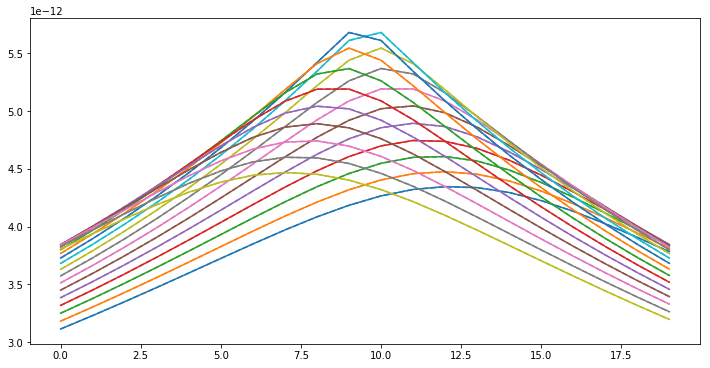

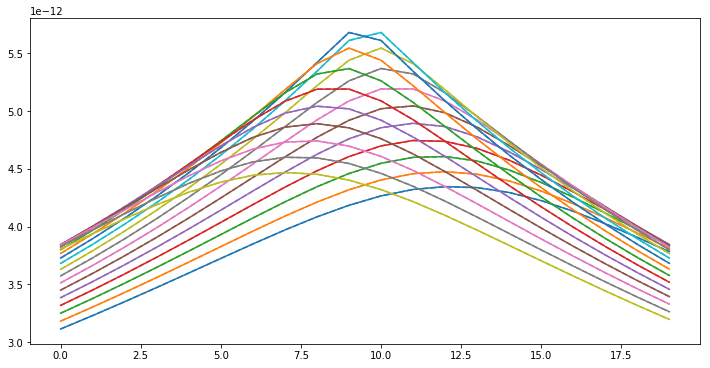

In [82]:
fg = plt.figure(figsize=(12,6))
ax1 = plt.gca()
for k in [0, 20, 40, 60, 80]:
    for j in range(0, 380, 20):
        ln, = ax1.plot(local_intensities[k][j:j+20], ls='-')
        clr = ln.get_color()
        #
        #ax1.plot(local_intensities_mg[k][j:j+20], ls='--', color=clr)
        #ax1.plot(local_intensities_mg[k,j:j+20], ls='--', color=clr)
        ax1.plot(local_intensities_mg[k,j:j+20], ls='--', color=clr)
        #Abreak
    break
    

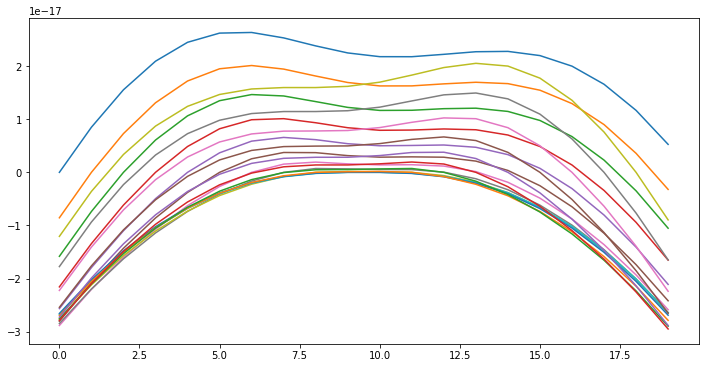

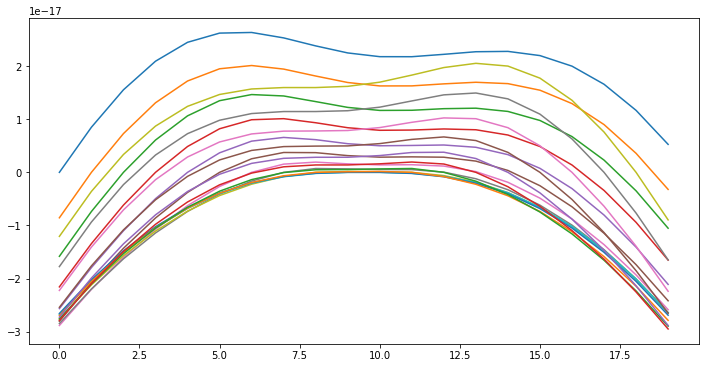

In [83]:
fg = plt.figure(figsize=(12,6))
ax1 = plt.gca()
for k in [0, 20, 40, 60, 80]:
    for j in range(0, 380, 20):
        ln, = ax1.plot(local_intensities[k,j:j+20]-local_intensities_mg[k][j:j+20], ls='-')
        clr = ln.get_color()
        #
        #ax1.plot(local_intensities_mg[k][j:j+20], ls='--', color=clr)
        #break
    break
    

In [ ]:
from globalETAS import Earthquake, deg2kmn
#
class NETAS_block(Earthquake):
    # Note: it might make more sense to include an Earthquke(), or list of Earthquake()s rather than subclassing.
    #. For batched MPP, for example, it would be possible to pre-construct a complete array of sites for multiple
    #  inputs (Earthquake()s). On the other hand, that introduces some opportunity for memory mis-management, 
    #. mistakes, or requiring indexing (aka, you have earthquakes that are not close together, maybe non-
    #. contiguous lattice sites)...
    def __init__(self, times=None, sptial_intensity_threshold=1e3, time_intensity_threshold=None, 
                 lon_0=0., lat_0=0., d_lon=.1, d_lat=.1,
                 *args, **kwargs):
        '''
        # @times: an iterable of times
        # @intensity_threshold: compute range by invertng spatial-omori; solve for 1/this.
        # @time_intensity_threshold: same, but for temporal distributionza
        # @lon_0, lat_0 : zero-point for lon, lat bins, respectively.
        # # parent array binning:
        #
        # TODO: what is the best parent binning convention? allow negative bins indices? Maybe we just
        #. leave that up to the parent object. I think that, by itself, negative index labels, centered
        #. on LL=[0,0] is most intuitive.
        # @d_lon, d_lat : lon, lat bin sizes, respectively
        #. bin indices are then j = int((lon - lon_0)/d_lon), k = int( (lat - lat_0)/d_lat)
        # 
        # parent __init__(): __init__(self, dict_or_recarray, transform_type='equal_area', transform_ratio_max=5.,
            ab_ratio_expon=.5, t_1=None, t_2=None)
        #
        '''
        #
        super(NETAS_block, self).__init__(*args, **kwargs)
        #
        # now, compute the spatial range and optionally the temporal range, or more specifically
        #   the lon, lat, time dimensions/indices. compute these as pairs: [[k_label, value], ...]
        #.  k_label: the index "label", or the index in a larger (global) lattice.
        #.  an we use their ordering for direct indexing.
        delta_lat = self.etas_range()/deg2km
        delta_lon = delta_lat*numpy.cos(self.lat*scipy.constants.deg)
        #
        lat_min = int((self.lat - delta_lat)/d_lat)*d_lat
        lon_min = int((self.lon - delta_lon)/d_lon)*d_lon
        #
        self.__dict__.update({'delta_lat':delta_lat, 'delta_lon':delta_lon, 'lat_min':lat_min, 'lon_min':lon_min})
        #
        # TODO: write these as functions to save memory? They will typically be called once
        #. and then return a 2D array of intensities.
        #lats = numpy.arange(lat_min, lat_min + 2*delta_lat, d_lat)
        #lats_index_labels = ((lats-lat_0)/d_lat).astype(int)
        #
        #lons = numpy.arange(lon_min, lon_min + 2*delta_lon, d_lon)
        #lons_index_labels = ((lons-lon_0)/d_lon).astype(int)
    #
    @property
    def lats(self):
        # TODO: are we de-modularizing too much here? I think maybe we just compute lats and lons
        #. at this level. we leave the binning to the calling function. 
        #lats = numpy.arange(self.lat_min, self.lat_min + 2*self.delta_lat, self.d_lat)
        #lats_index_labels = ((self.lats-self.lat_0)/self.d_lat).astype(int)
        #
        #return numpy.core.records.fromarrays([lats_index_labels, lats], dtype=[('index', '>i8'), ('lat', '>f8')])
        return numpy.arange(self.lat_min, self.lat_min + 2*self.delta_lat, self.d_lat)
    #                           
    @property
    def lons(self):
        #lons = numpy.arange(self.lon_min, self.lon_min + 2*self.delta_lon, self.d_lon)
        #lons_index_labels = ((self.lons - self.lon_0)/self.d_lon).astype(int)
        #
        #return numpy.core.records.fromarrays([lons_index_labels, lons], dtype=[('index', '>i8'), ('lat', '>f8')])
        return numpy.arange(self.lon_min, self.lon_min + 2*self.delta_lon, self.d_lon)
    #
    def etas_range(self, spatial_intensity_threshold=None):
        spatial_intensity_threshold = spatial_intensity_threshold or self.spatial_intensity_threshold
        if spatial_intensity_threshold is None:
            return None
        #
        return self.r_0*(spatial_intensity_threshold**(1./self.q) - 1.)
    #
    def etas_temporal_range(self, time_intensity_threshold=None):
        time_intensity_threshold = time_intensity_threshold or self.time_intensity_threshold
        if time_intensity_threshold is None:
            return None
        #
        return self.t_0*(time_intensity_threshold**(1./self.p) - 1.)
                



In [ ]:
print('** ', scipy.constants.degree*360.)

In [ ]:
A = numpy.random.random(20)*20
print(A)
print(A.astype(int) )

In [ ]:
print(numpy.arange(5,10,.1))

In [ ]:
def f_lon(x):
    return (x+180)%360. - 180

for x in [-190., -120., -115., 120., 115., 190.]:
    print('** {} : {}'.format(x, f_lon(x)))
#


In [42]:
#########
# we're getting a small difference in local_intensities() values for lon,lat submitted as a 1D (with labels)
#. array, aka [lon0, lon0, lon0,...],  [lat0, lat1, lat2, ...] vs 2D arrays (lon and lat are each 2D arrays,
#. indexed by array position).
#
# the difference is on order 10**-17 for values of 10**-12 (so, one part in 10**5). this could be a float/double
#. type thing, or it could be something else...
# they seem to equal; it is possible the type difference becomes expressed somnewhere else, or maybe it's a lat/lon
# conversion issue, which would explain the symmetrical shape of the error.
#
lon_dim = numpy.linspace(eq.lon-2., eq.lon+2., 5)
lat_dim  = numpy.linspace(eq.lat-2., eq.lat+2., 5)
#
lons_mg, lats_mg = numpy.meshgrid(lon_dim, lat_dim)
LL_i = numpy.array(list(itertools.product(lon_dim, lat_dim)))
LL_r = numpy.array([lons_mg.T.ravel(), lats_mg.T.ravel()]).T
#


print('lon: ', lon_dim)
print('lat: ', lat_dim)
#
print('lons_mg: ', lons_mg)
print('lats_mg: ', lats_mg)
#
#
print('LL_i: ', LL_i)
print('LL_r: ', LL_r)
#
print('** ?? LL_i == LL_r? {}'.format(LL_i == LL_r))
#
# this all appears to check out so far. what about spherical distances?

#Rs_sph_i = eq.spherical_dist(to_lon_lat = numpy.array([lons, lats]))
Rs_sph_i = eq.spherical_dist(to_lon_lat = LL_i.T )
Rs_sph_r = eq.spherical_dist(to_lon_lat = LL_r.T )
Rs_sph_r2 = eq.spherical_dist(to_lon_lat = numpy.meshgrid(lon_dim, lat_dim))



lon:  [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
lat:  [33.7695 34.7695 35.7695 36.7695 37.7695]
lons_mg:  [[-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
 [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
 [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
 [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]
 [-119.5993333 -118.5993333 -117.5993333 -116.5993333 -115.5993333]]
lats_mg:  [[33.7695 33.7695 33.7695 33.7695 33.7695]
 [34.7695 34.7695 34.7695 34.7695 34.7695]
 [35.7695 35.7695 35.7695 35.7695 35.7695]
 [36.7695 36.7695 36.7695 36.7695 36.7695]
 [37.7695 37.7695 37.7695 37.7695 37.7695]]
LL_i:  [[-119.5993333   33.7695   ]
 [-119.5993333   34.7695   ]
 [-119.5993333   35.7695   ]
 [-119.5993333   36.7695   ]
 [-119.5993333   37.7695   ]
 [-118.5993333   33.7695   ]
 [-118.5993333   34.7695   ]
 [-118.5993333   35.7695   ]
 [-118.5993333   36.7695   ]
 [-118.5993333   37.7695   ]
 [-11

In [58]:
print('** ii', Rs_sph_i)
print('** r1', Rs_sph_r)
print('** r2', Rs_sph_r2.T)
print('**\n**:: ', (Rs_sph_i == Rs_sph_r).all() )
print('** :: ', (Rs_sph_r.ravel() == (Rs_sph_r2.T).ravel()).all() )

** ii [288.10684737 213.14203774 180.63954247 211.20820178 285.24429538
 240.68080891 143.70631776  90.32094641 142.99075065 239.82691633
 222.63769004 111.31884502   0.         111.31884502 222.63769004
 240.68080891 143.70631776  90.32094641 142.99075065 239.82691633
 288.10684737 213.14203774 180.63954247 211.20820178 285.24429538]
** r1 [288.10684737 213.14203774 180.63954247 211.20820178 285.24429538
 240.68080891 143.70631776  90.32094641 142.99075065 239.82691633
 222.63769004 111.31884502   0.         111.31884502 222.63769004
 240.68080891 143.70631776  90.32094641 142.99075065 239.82691633
 288.10684737 213.14203774 180.63954247 211.20820178 285.24429538]
** r2 [[288.10684737 213.14203774 180.63954247 211.20820178 285.24429538]
 [240.68080891 143.70631776  90.32094641 142.99075065 239.82691633]
 [222.63769004 111.31884502   0.         111.31884502 222.63769004]
 [240.68080891 143.70631776  90.32094641 142.99075065 239.82691633]
 [288.10684737 213.14203774 180.63954247 211.208